# Fourier Basics
This code outlines the attempts to understand FFT implementation in Python. The final result is at the top. I explored both the built in scipy function as well as creating my own version. I was testing it original with a picture of my friend, and later moved on to simple particle images. 

In [ ]:
import numpy as np
import PIL as pil
import matplotlib.pyplot as plt
%matplotlib inline
#import cv2
import scipy
import scipy.misc
import scipy.signal
import warnings
import imageio
warnings.filterwarnings("ignore", category=DeprecationWarning) 
plt.rcParams['figure.figsize'] = (50,50)
plt.rcParams['image.cmap'] = 'gray'
#import mrc as mrc


Wall time: 16.7 s


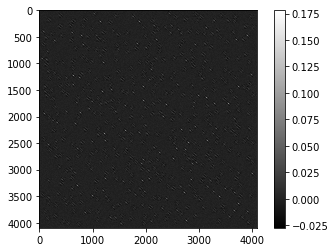

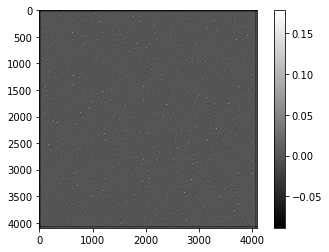

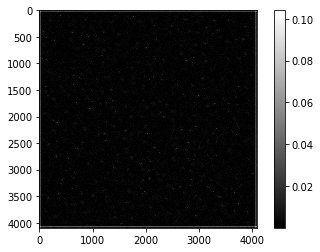

In [2]:
%%time
#Main code
def normalized_cc(I,T,use_numpy_ver=True):
    T = T - np.mean(T)
    # zero padding the template
    [height,length] = I.shape
    [bheight,blength] = T.shape
    
    x = [height/2-bheight/2]
    y = [length/2-bheight/2]
    x = int(x[0])
    y = int(y[0])
    
    padding = np.zeros_like(I)
    
    # Create mask of zero-padded template
    padding[x:x+int(T.shape[0]), y:y+int(T.shape[1])]=1.0
    
    
    # Compute correlations of I and I**2
    crossc = fast_convolve(I,T[::-1,::-1],use_numpy_ver)
    denom1 = np.sqrt(fast_convolve(I**2, padding,use_numpy_ver))
    denom2 = np.sqrt(np.sum((T**2)))
    
    # Compute and return normalized cross-correlation
    ncc = crossc/(denom1*denom2)
#     plt.imshow(abs(ncc))
    
    return ncc
    

def fast_convolve(I,T,use_numpy_ver=True):
    
    if use_numpy_ver:
        
        [height,length] = I.shape
        [bheight,blength] = T.shape
        x = [height/2-bheight/2]
        y = [length/2-bheight/2]
        x = int(x[0])
        y = int(y[0])

        z = np.zeros_like(I)
        z[x:x+int(T.shape[0]), y:y+int(T.shape[1])] = T

        f1 = np.fft.rfft2(I)
        f2 = np.fft.rfft2(z)

        conv = f1*f2

        fc = np.fft.fftshift(np.fft.irfft2(conv))
        
#         fc = np.roll(fc, -int(height/2+1), axis=0)
#         fc = np.roll(fc, -int(length/2+1), axis=1)
    else:
        fc = scipy.signal.fftconvolve(I,T,'same')
        
    return fc

ncc_np = normalized_cc(scipy.misc.imread("mgtest.png", 1),scipy.misc.imread("binnedpart.jpg", 1))
ncc_sp = normalized_cc(scipy.misc.imread("mgtest.png", 1),scipy.misc.imread("binnedpart.jpg", 1),use_numpy_ver=False)
plt.figure()
plt.imshow(ncc_np)
plt.colorbar()

plt.figure()
plt.imshow(ncc_sp)
plt.colorbar()

plt.figure()
plt.imshow(abs(ncc_np - ncc_sp))
plt.colorbar()

#scipy.misc.imsave('check2.jpg', abs(ncc_sp))
#11.8 seconds for the numpy stuff, 11.6 for scipy

In [4]:
%%time
#Counter based on OpenCV code
gray = cv2.imread("check3.jpg", 0)

## threshold
th, threshed = cv2.threshold(gray, 100, 255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)


## findcontours
_,cnts,_ = cv2.findContours(threshed, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)


## filter by area
s1= 3
s2 = 50
xcnts = []
for cnt in cnts:
    if s1<cv2.contourArea(cnt) <s2:
        xcnts.append(cnt)

print("Dots number: {}".format(len(xcnts)))

NameError: name 'cv2' is not defined

<class 'numpy.ndarray'>
Wall time: 1.59 s


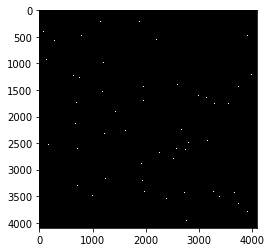

In [20]:
%%time
#Counting the particles by removing maximal peaks
b = abs(ncc)>0.97
z = b*ncc
plt.imshow(z)
scipy.misc.imsave("check3.jpg",z)
print(type(ncc))
if 0==1:
    binsize = 10
    mask = np.zeros((binsize));
    t = int(binsize/2)

    k=0
    while np.amax(z)>0.90:
        y = np.argmax(z)%4096
        x = np.argmax(z)//4096
        z[x-t:x+t,y-t:y+t] = mask
        k = k+1
    print(k)
#16.8 second with scipy stuff, still not workign with numpy stuff
#Type is numpy.ndarray and for scipy is also numpy.ndarray

In [26]:
img = pil.Image.open('imagetest3.jpg')
img
img2 = pil.Image.open('imagetest3.jpg').convert('LA')
img2
img_as_np = np.array(img2)
img_as_np
img_fft = np.fft.fft2(img_as_np)
img_fft
img0 = img2
width,height = img2.size
img4 = pil.Image.new('L',[width, height],color=0)

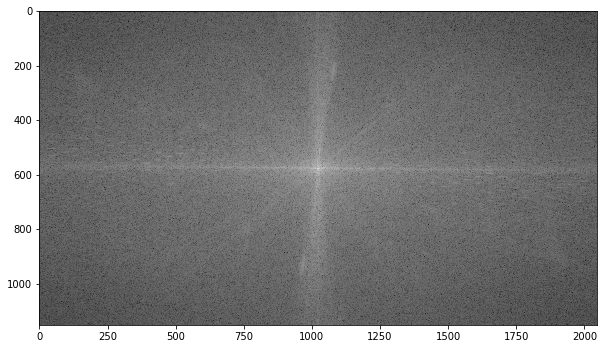

In [18]:
img = scipy.misc.imread('imagetest3.jpg',1)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f) #Shift the zero component to the center
magnitude_spectrum = np.log(np.abs(fshift))
magnitude_spectrum2 = 20*magnitude_spectrum
#plt.imshow(img)
#plt.subplot(131),plt.imshow(img, cmap = 'gray')
#plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.imshow(magnitude_spectrum, cmap = 'gray')
#plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

(<matplotlib.axes._subplots.AxesSubplot at 0x1ecd99f0f28>,
 <matplotlib.image.AxesImage at 0x1ecd9a99550>)

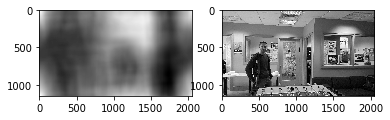

In [6]:
img = scipy.misc.imread('imagetest3.jpg',1)
img_as_np1 = np.fft.fft2(img)
img_as_np2 = np.fft.fftshift(img_as_np1)
mag_spec = np.log(np.abs(img_as_np2))
plt.imshow(mag_spec)

img2 = scipy.misc.imread('Images/jay.jpg',1)
img2_as_np1 = np.fft.fft2(img2[::-1,::-1])
img2_as_np2 = np.fft.fftshift(img2_as_np1)
mag_spec2 = np.log(np.abs(img2_as_np2))
plt.imshow(mag_spec2)

conv = img_as_np1*img2_as_np1
conv = np.fft.ifft2(conv)
plt.subplot(121),plt.imshow(abs(conv))
plt.subplot(122),plt.imshow(np.array(img))

FileNotFoundError: [Errno 2] No such file or directory: 'Images/jay.jpg'

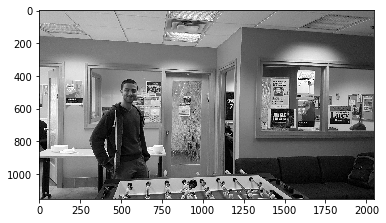

In [3]:
img1 = scipy.misc.imread('imagetest3.jpg',1)
plt.figure()
plt.imshow(img1,cmap='gray')
f1 = np.fft.fft2(img1)

img2 = scipy.misc.imread('Images/jay.jpg',1)
img2 -= np.mean(img2)
plt.figure()
plt.imshow(img2,cmap='gray')
f2 = np.fft.fft2(img2)

img3 = scipy.misc.imread('Images/blackjay2.jpg',1)
img3 -= np.mean(img3)
plt.figure()
plt.imshow(img3,cmap='gray')
f3 = np.fft.fft2(img3)

conv1 = f1*f2
conv1 = np.fft.ifft2(conv1)

plt.figure()
plt.imshow(abs(conv1),cmap='gray')#it has complex values
plt.colorbar()

conv2 = f1*np.conjugate(f2)
conv2 = np.fft.ifft2(conv2)/(np.linalg.norm(img1)*np.linalg.norm)

conv3 = f1*f3 
conv3 = np.fft.ifft2(conv3) / (np.linalg.norm(img1)*np.linalg.norm(img3))


plt.figure()
plt.imshow(abs(conv3), cmap='gray')
plt.colorbar()

conv4 = f1*np.conjugate(f3)
conv4 = np.fft.ifft2(conv4) / (np.linalg.norm(img1)*np.linalg.norm(img3))

plt.figure()
plt.imshow(abs(conv4),cmap='gray')
plt.colorbar()

In [ ]:
img1 = scipy.misc.imread('jay.jpg',1)
f1 = np.fft.fft2(img1)
img2 = scipy.misc.imread('blackjay.jpg',1)
f2 = np.fft.fft2(img2)
conv = f2*f1
conv = np.fft.ifft2(conv)

plt.imshow(abs(conv))#it has complex values
scipy.misc.imsave('whtblkconv.jpg',abs(conv))


In [ ]:
image = np.zeros((1152,2048,3),dtype = 'uint8')
plt.imshow(image)
scipy.misc.imsave('black.jpg',image)

In [ ]:
img1 = scipy.misc.imread('9[1].jpg',1)
f1 = np.fft.fft2(img1)
img2 = scipy.misc.imread('allblack.jpg',1)
f2 = np.fft.fft2(img2)
conv = f1*f2
conv = np.fft.ifft2(conv)

plt.imshow(abs(conv))#it has complex values
scipy.misc.imsave('snowguyconv.jpg',abs(conv))

(array([440, 440, 440, ..., 649, 649, 649], dtype=int64), array([375, 376, 377, ..., 647, 648, 649], dtype=int64))
440


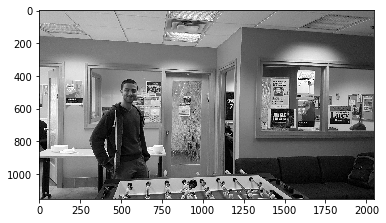

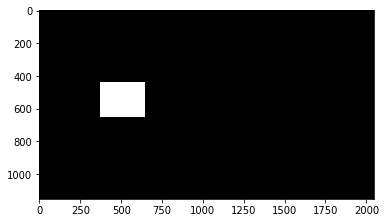

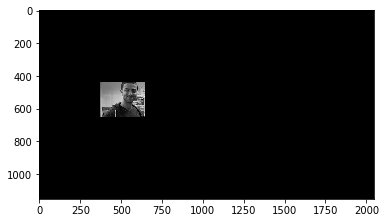

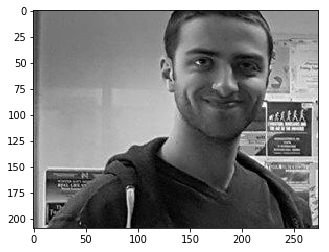

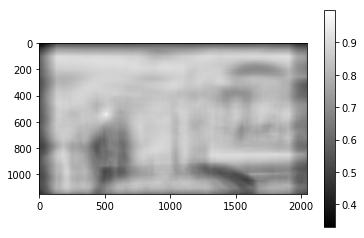

In [4]:
#Creating a script to make a mask for the image
img = scipy.misc.imread('imagetest3.jpg',1)
plt.figure()
plt.imshow(img, cmap = 'gray')

mask = np.zeros_like(img)
# mask[440:1000,325:650] = 255
mask[440:650,375:650] = 255
plt.figure()
plt.imshow(mask, cmap = 'gray')

masked = mask*img
plt.figure()
plt.imshow(masked, cmap = 'gray')

arr = np.nonzero(masked)
print(arr)
print(arr[0][0])
b = masked[arr[0][0]:arr[0][-1],arr[1][0]:arr[1][-1]]
# b -= np.mean(b)
plt.figure()
plt.imshow(b,cmap = 'gray')

p = np.zeros_like(img)
[height,length] = p.shape
[bheight,blength] = b.shape
x = int(height/2-bheight/2)
y = int(length/2-blength/2)

mask_im = np.zeros_like(img)
mask_im[x:x+int(b.shape[0]),y:y+int(b.shape[1])] = 1.0
"""
f1 = np.fft.fft2(img)
f2 = np.fft.fft2(p)
f3 = np.fft.fft2(mask_im)
fconv = f1*f2
denom1 = np.sqrt(np.sum(f2*f3))
denom2 = np.sqrt(np.sum(b**2))"""

num = scipy.signal.fftconvolve(img,b[::-1,::-1],'same')
denom1 = np.sqrt(scipy.signal.convolve(img**2,mask_im,'same'))
denom2 = np.sqrt(np.sum(b**2))

plt.figure()
plt.imshow(num/(denom1*denom2),cmap = 'gray')
plt.colorbar()


(array([440, 440, 440, ..., 999, 999, 999], dtype=int64), array([325, 326, 327, ..., 647, 648, 649], dtype=int64))
440


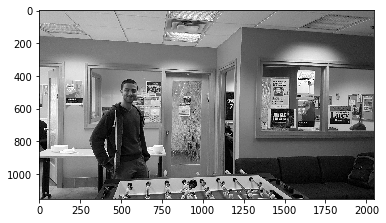

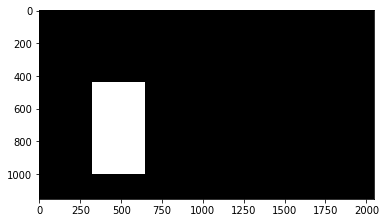

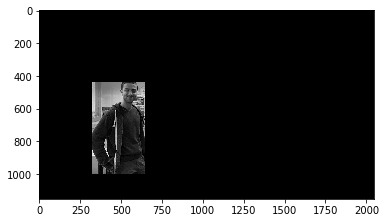

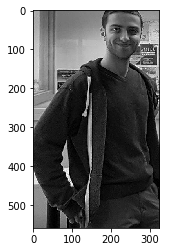

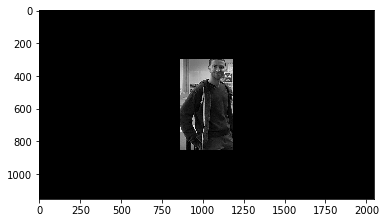

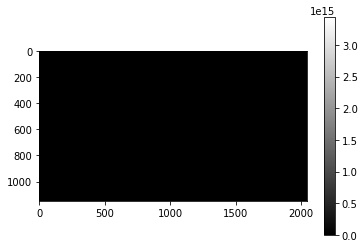

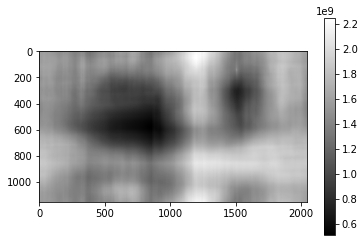

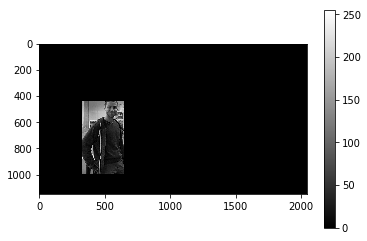

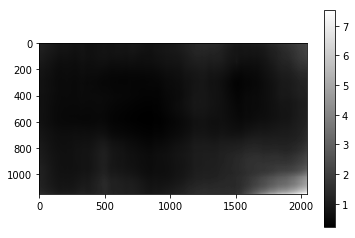

In [3]:
#Creating a script to make a mask for the image
img = scipy.misc.imread('imagetest3.jpg',1)
plt.figure()
plt.imshow(img, cmap = 'gray')

mask = np.zeros_like(img)
mask[440:1000,325:650] = 1.0
# mask[440:650,375:650] = 255
plt.figure()
plt.imshow(mask, cmap = 'gray')

masked = mask*img
plt.figure()
plt.imshow(masked, cmap = 'gray')

arr = np.nonzero(masked)
print(arr)
print(arr[0][0])
b = masked[arr[0][0]:arr[0][-1],arr[1][0]:arr[1][-1]]
#b -= np.mean(b)
plt.figure()
plt.imshow(b,cmap = 'gray')

p = np.zeros_like(img)
[height,length] = p.shape
[bheight,blength] = b.shape
x = int(height/2-bheight/2)
y = int(length/2-blength/2)
p[x:x+int(b.shape[0]),y:y+int(b.shape[1])] = b

mask_im = np.zeros_like(p)
mask_im[x:x+int(b.shape[0]),y:y+int(b.shape[1])] = 1.0

plt.figure()
plt.imshow(p,cmap = 'gray')

#num = scipy.signal.fftconvolve(img,b[::-1,::-1],'same')
if 1==1:
    f1 = np.fft.fft2(img)
    f2 = np.fft.fft2(p[::-1,::-1])
    conv = f1*f2
    num = np.fft.ifft2(conv)
    plt.figure()
    plt.imshow(abs(conv),cmap = 'gray')
    plt.colorbar()
else:
    num = scipy.signal.fftconvolve(img,b[::-1,::-1],'same')

denom1 = np.sqrt(scipy.signal.fftconvolve(img**2,mask_im,'same'))
denom2 = np.sqrt(np.sum(p**2))




plt.figure()
plt.imshow(abs(num),cmap = 'gray')
plt.colorbar()

plt.figure()
plt.imshow(masked,cmap = 'gray')
plt.colorbar()

plt.figure()
plt.imshow(abs(num/(denom1*denom2)),cmap = 'gray')
plt.colorbar()


(array([1260, 1260, 1260, ..., 1349, 1349, 1349], dtype=int64), array([1030, 1031, 1032, ..., 1117, 1118, 1119], dtype=int64))
1260
0.9652891723217791


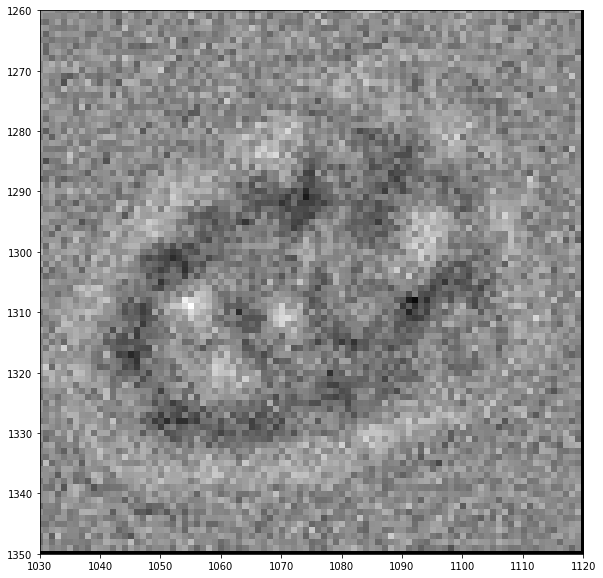

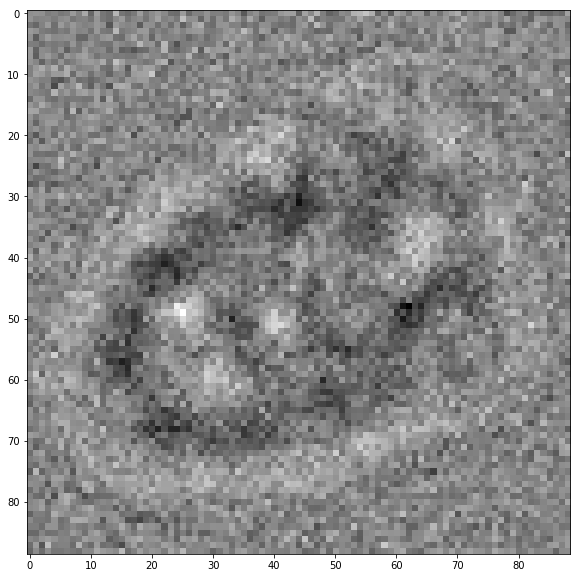

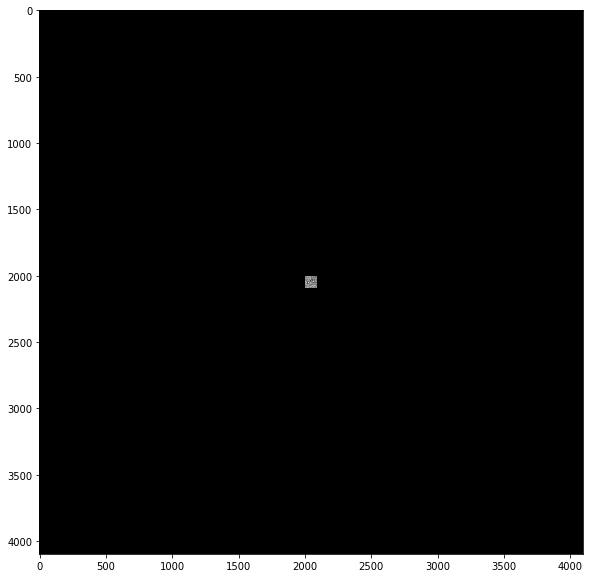

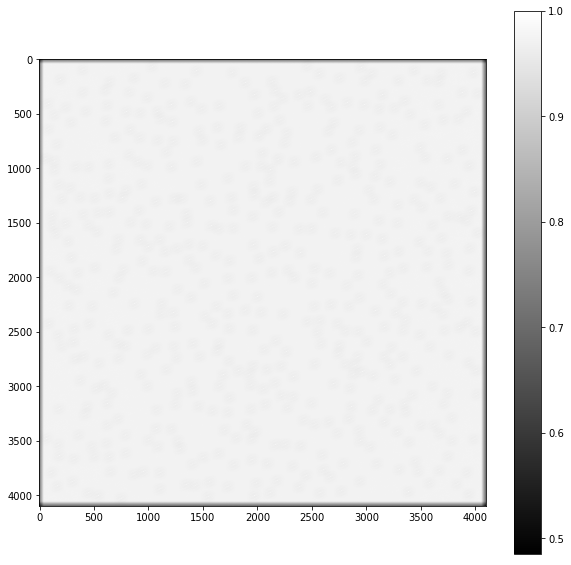

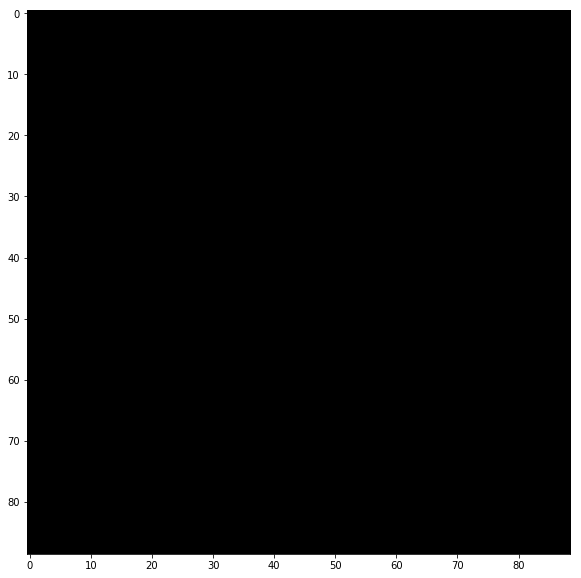

In [76]:
img = scipy.misc.imread('mgtest.png',1)
plt.figure()
plt.imshow(img, cmap='gray')

#Create a mask for a particle image
mask = np.zeros_like(img)
mask[1260:1350, 1030:1120] = 255

masked = mask*img
plt.imshow(masked, cmap = 'gray')
plt.xlim(1030,1120)
plt.ylim(1350,1260)

#Gets an image of just the particle
arr = np.nonzero(masked)
print(arr)
print(arr[0][0])
b = masked[arr[0][0]:arr[0][-1],arr[1][0]:arr[1][-1]]
#b -= np.mean(b)
plt.figure()
plt.imshow(b,cmap = 'gray')
scipy.misc.imsave('binnedpart.jpg',b)

#create an image with the particle in center, same size as img
p = np.zeros_like(img)
[height,length] = p.shape
[bheight,blength] = b.shape
x = int(height/2-bheight/2)
y = int(length/2-blength/2)


p[x:x+int(b.shape[0]),y:y+int(b.shape[1])] = b
mask_im = np.zeros_like(img)
mask_im[x:x+int(b.shape[0]),y:y+int(b.shape[1])] = 1.0

plt.figure()
plt.imshow(p,cmap = 'gray')


num = scipy.signal.fftconvolve(img,b[::-1,::-1],'same')
denom1 = np.sqrt(scipy.signal.fftconvolve(img**2,mask_im,'same'))
denom2 = np.sqrt(np.sum(b**2))

num2 = num/(denom1*denom2)
plt.figure()
plt.imshow(num/(denom1*denom2),cmap = 'gray')
plt.colorbar()

box = np.ones_like(b)
plt.figure()
plt.imshow(box,cmap = 'gray')

scipy.misc.imsave('lokhere3.jpg', num2)

In [4]:
img = scipy.misc.imread('mgtest.png',1)
#plt.figure()
#plt.imshow(img, cmap='gray')

#Create a mask for a particle image
mask = np.zeros_like(img)
mask[1260:1350, 1030:1120] = 255

#Pull a particle image
masked = mask*img
#plt.figure()
#plt.imshow(masked, cmap = 'gray')

#Gets an image of just the particle
arr = np.nonzero(masked)
#print(arr)
#print(arr[0][0])
b = masked[arr[0][0]:arr[0][-1],arr[1][0]:arr[1][-1]]

#scipy.misc.imsave('binnedpart.jpg', b)


#plt.figure()
#plt.imshow(b,cmap = 'gray')

[height,length] = img.shape
[bheight,blength] = b.shape
x = int(height/2-bheight/2)
y = int(length/2-blength/2)

#Creates a mask of img with a square the size of b in the center
mask_im = np.zeros_like(img)
mask_im[x:x+int(b.shape[0]),y:y+int(b.shape[1])] = 1.0
#plt.figure()
#plt.imshow(mask_im, cmap='gray')
"""
#Using numpy get same results
npimg = np.fft.fft2(img)
npb = np.zeros_like(img)
npb[x:x+int(b.shape[0]),y:y+int(b.shape[1])] = b[::-1,::-1]
npb = np.fft.fft2(npb)
npcc = npimg*npb

npcc = np.fft.ifft2(npcc)
npdenom1 = np.sqrt(np.fft.ifft2(np.fft.fft2(img**2)*np.fft.fft2(mask_im[::-1,::-1])))
npdenom2 = np.sqrt(np.sum(b**2))

plt.figure()
plt.imshow(abs(npcc))
plt.colorbar()
npcc = abs(npcc/(npdenom1*npdenom2))
plt.figure()
plt.imshow(npcc)
plt.colorbar()"""
#Convolve the img with the inverse particle, as that is the formula for cross correlation
num = scipy.signal.fftconvolve(img,b[::-1,::-1],'same')

#Calculate certain factors to normalize the result
denom1 = np.sqrt(scipy.signal.fftconvolve(img**2,mask_im,'same'))
denom2 = np.sqrt(np.sum(b**2))

num2 = num/(denom1*denom2)
scipy.misc.imsave('lookhere4.jpg',num2)
#plt.figure()
#plt.imshow(num, cmap='gray')

#plt.figure()
#plt.imshow(num2,cmap = 'gray')
#plt.colorbar()

"""
scipy.misc.imsave('checkmenowww.jpg', abs(npcc))
scipy.misc.imsave('checkmenowwww2.jpg', abs(npcc/(npdenom1*npdenom2)))
scipy.misc.imsave('checkplz.jpg', abs(npcc[::-1,::-1]))"""

"\nscipy.misc.imsave('checkmenowww.jpg', abs(npcc))\nscipy.misc.imsave('checkmenowwww2.jpg', abs(npcc/(npdenom1*npdenom2)))\nscipy.misc.imsave('checkplz.jpg', abs(npcc[::-1,::-1]))"

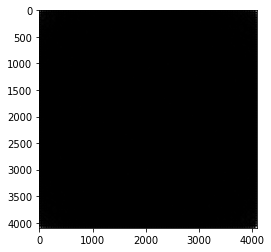

501


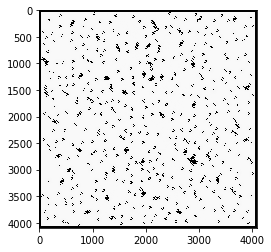

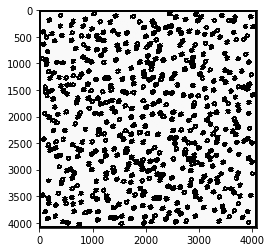

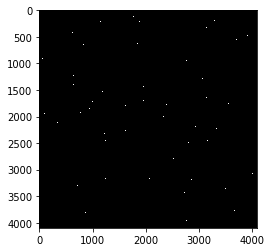

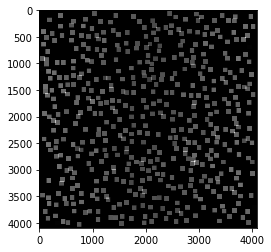

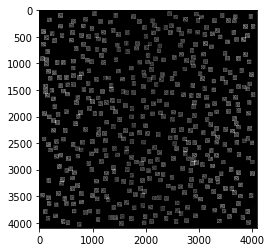

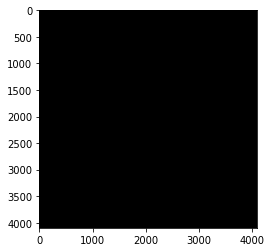

In [11]:
box = np.ones_like(b)


b1 = num2 > np.mean(num2)
b2 = num2>0.97
b3 = num2>0.975

z1 = num2*b1
z2 = num2*b2
z3 = num2*b3

plt.figure()
plt.imshow(z1, cmap = 'gray')
plt.figure()
plt.imshow(z2, cmap = 'gray')
plt.figure()
plt.imshow(z3, cmap = 'gray')

num3 = scipy.signal.fftconvolve(z3, box,'same')
plt.figure()
plt.imshow(num3, cmap = 'gray')

num4 = num3*img
plt.figure()
plt.imshow(num4, cmap='gray')
scipy.misc.imsave('look.jpg', num4)

y = np.argmax(z3)%4096
x = np.argmax(z3)//4096
mx = z3[x,y]

binsize = 10
mask = np.zeros((binsize));
t = int(binsize/2)

k=0
while np.amax(z3)>0.9:
    y = np.argmax(z3)%4096
    x = np.argmax(z3)//4096
    z3[x-t:x+t,y-t:y+t] = mask
    k = k+1
print(k)

plt.figure()
plt.imshow(z3, cmap="gray")
    
    
    

In [15]:
mrc.readMRC('imgdata_184_1.mrc')


array([[[ 2.9761858 ],
        [-1.4333578 ],
        [ 2.953794  ],
        ...,
        [ 0.6813079 ],
        [-6.496409  ],
        [ 9.861782  ]],

       [[ 1.7087587 ],
        [-9.24597   ],
        [ 0.08462429],
        ...,
        [-3.9311595 ],
        [ 0.9825591 ],
        [ 0.40315807]],

       [[ 3.07991   ],
        [ 5.2325544 ],
        [ 2.2676265 ],
        ...,
        [ 4.4246793 ],
        [-1.2820828 ],
        [-1.623272  ]],

       ...,

       [[ 6.4278502 ],
        [ 1.0560002 ],
        [-0.84538174],
        ...,
        [-3.9511752 ],
        [ 5.846571  ],
        [ 6.7634435 ]],

       [[ 3.6564927 ],
        [-4.726597  ],
        [ 2.595     ],
        ...,
        [ 1.7256598 ],
        [-0.16491205],
        [ 0.8856652 ]],

       [[-0.2709295 ],
        [ 5.164694  ],
        [-2.8309393 ],
        ...,
        [-2.0153472 ],
        [ 4.6931806 ],
        [ 9.317115  ]]], dtype=float32)

129.87068980932236

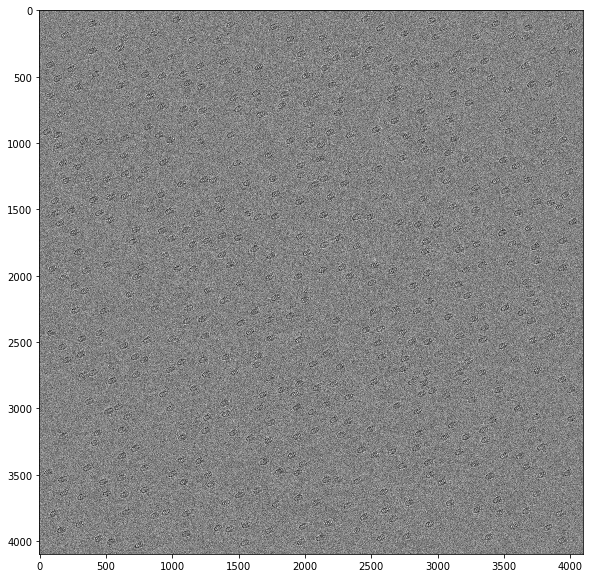

In [103]:
img = scipy.misc.imread('lookhere_normal.jpg',1)
img2 = scipy.misc.imread('lookhere4.jpg')

test = scipy.misc.imread('mgtest.png')
test2 = scipy.misc.imread('mgtest.png',1)

np.mean(test)